## Inicjalizacja środowiska programistycznego

In [41]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Analiza obrazów - Zbiór EMNIST

Jako zbiorów treningowych do analizy obrazów użyjemy rozszerzonego zbioru MNIST -
[EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset)
zawierającego dużą liczbę zdjęć ręcznie pisanych liter i cyfr. Zdjęcia mają rozdzielczość `28x28` pikseli,
a każdy piksel koduje poziom szarości w 8 bitowej skali.

# Przygotowanie danych

**Proszę:**

* pobrać zbiór [EMNIST](https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip)
* rozpakować plik .zip
* załadować do środowiska Colab, do katalogu `data` pliki (`label` i `images`) dla zbioru `emnist-digits-test`
* rozpakować w środowisku Colab pliki `.gzip`

**Uwaga:**

* pliki są duże. Optymalnie jest je pobrać bezpośrednio na Colab, lub na dysk Google

In [4]:
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!gzip -d gzip/*test*

zsh:1: command not found: wget
unzip:  cannot find or open gzip.zip, gzip.zip.zip or gzip.zip.ZIP.
zsh:1: no matches found: gzip/*test*


Dane wczytamy korzystając z gotowej funkcji `getEMNIST(datasetName, datasetPath)` która zwraca krotkę `(features, labels)` dla zbioru o nazwie odpowiadającej nazwie odpowiedniego pliku, np.:
  ```Python
  
  x, y = getEMNIST('emnist-digits-test', datasePath)
  
  ```
  <br></br>

**Proszę:**

* umieścić funkcję w module `modules/emnist_functions.py`  
* rozpakować dane treningowe dla liczb: `emnist-digits-test`
* wydzielić `30 000` przykładów na zbiór uczący
* wydzielić `10 000` przykładów na zbiór walidacyjny

**Uwagi:**

* dane są zapisane w binarnym formacie IDX. Do ich dekodowania można użyć pakietu `idx2numpy`. Pakiet można doinstalować
  do aktualnej sesji korzystając z komendy `pip`. W komórce notatnika komendy linii poleceń trzeba poprzedzić wykrzyknikiem:
  ```Shell
  
  !pip install idx2numpy
  ```
  <br></br>
* zamiast wydzielania explicite zbioru walidacyjnego można użyć parametru `validation_split` metody `keras.model.fit()`:
  ```Python
  
  history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_split=0.1,   # 10% zbioru treningowego wydzielone na zbiór walidacyjny
                    callbacks=callbacks,
                    verbose=0)
  ```

In [5]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=c2a4d47d904e7dbee830e4fbf363bd2549be947072538679c209464949d8dbd2
  Stored in directory: /Users/jakubkusmierski/Library/Caches/pip/wheels/f7/48/00/ae031c97d62f39e1c3c4daa00426c09a65eb29ae5753a189ee
Successfully built idx2numpy


In [46]:
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

In [47]:
datasetPath = '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/gzip'
datasetName = 'emnist-digits-test'

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)


nTrainExamples = 30000
nValExamples = 10000
x_train = x[:nTrainExamples]
y_train = y[:nTrainExamples]

x_val = x[-nValExamples:]
y_val = y[-nValExamples:]

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (30000, 28, 28) (30000,)
Validation data shapes:  (10000, 28, 28) (10000,)


**Proszę:**

* napisać funkcję `plotMNIST(x, y, y_pred)`, która rysuje cztery losowe obrazy ze zbioru cech `x`, podpisane dwoma rodzajami etykiet
  zawartych w macierzach `y` i `y_pred`
* po dopracowaniu kodu funkcji umieścić ją w module `modules/emnist_functions.py`

**Wskazówka:**
* do rysowania obrazów można użyć funkcji `imshow(imgeData)`

/var/folders/0q/wbzln3c97rq2wyq7grftyjjm0000gn/T/ipykernel_70873/484002762.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,1].legend(bbox_to_anchor=(1.5,1), loc='upper left', title="Label: True/Predicted")


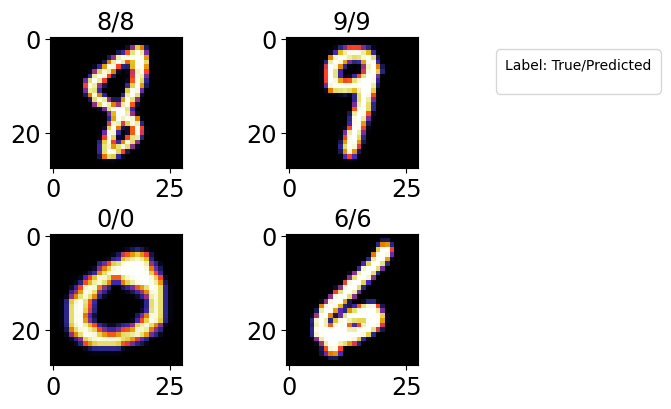

In [48]:
def plotMNIST(x, y, y_pred):
    '''
    fig, axs = plt.subplots(2, 2, figsize = (15, 15))
    for i in range(2):
        for j in range(2):
            idx = np.random.randint(0, x.shape[0])
            axs[i, j].imshow(x[idx], cmap = 'CMRmap')
            axs[i, j].set_title(f"True: {y[idx]}, Pred: {y_pred[idx]}")
            axs[i, j].axis('off')
    plt.show()
    '''
    indices = np.random.default_rng().integers(0, len(x), (4))
    fig, axes = plt.subplots(2, 2, figsize=(4.5,4.5))

    for index, axis in zip(indices, axes.flatten()):
        title = "{}/{}".format(y[index],y_pred[index])
        axis.imshow(x[index].T, cmap=plt.get_cmap('CMRmap'), label="A")
        axis.set_title(title)

    axes[0,1].legend(bbox_to_anchor=(1.5,1), loc='upper left', title="Label: True/Predicted")
    plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.4, hspace=0.5)
    

plotMNIST(x_train, y_train, y_train)

**Proszę:**

* wywołać funkcje ładującą dane i rysującą rysunki korzystając z modułu `emnist_functions`

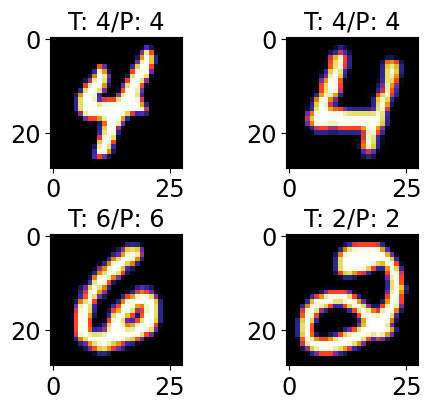

In [49]:
import emnist_functions as emnist_fcn


datasetName = "emnist-digits-test"
datasetPath = '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/gzip'
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
emnist_fcn.plotMNIST(x, y, y)

**Proszę:**

  * narysować histogramy krotności poszczególnych klas dla zbiorów treningowego i walidacyjnego

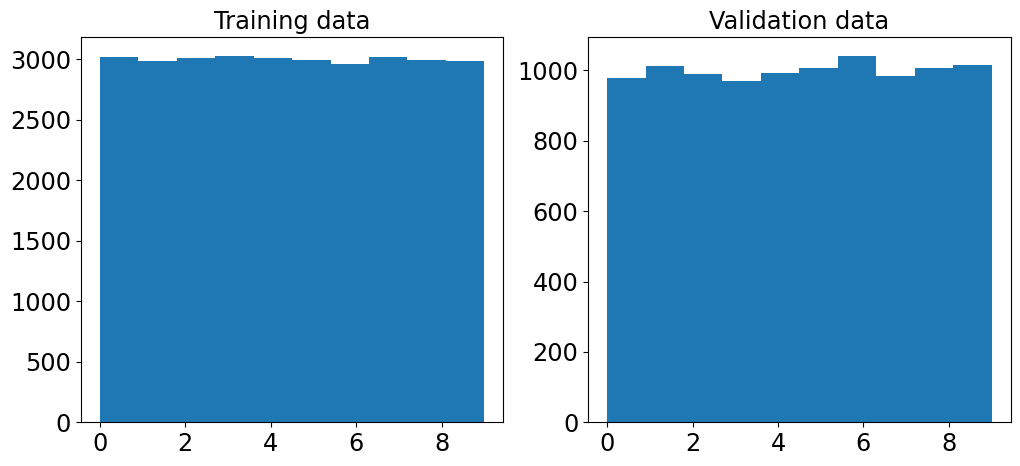

In [50]:
fig, axis = plt.subplots(1, 2, figsize=(12,5))
axis[0].hist(y_train, bins = 10)
axis[0].set_title("Training data")
axis[1].hist(y_val, bins = 10)
axis[1].set_title("Validation data")

pass

## Rozpoznawanie ręcznie pisanych cyfr

Mamy przed sobą zagadnienie kategoryzacji z wieloma klasami. Etykiety klas są podane w postaci numeru klasy:
```Python
print(y_train[:3])
[8 9 6]
```

Sieć, którą skonstruujemy, będzie estymowała prawdopodobieństwo przynależności do klasy na podstawie cech:

$$
{\huge
f_{g}(x) =  P(g|x)
}
$$

następnie użyjemy klasyfikacji Bayesa przypisując klasę o maksymalnym prawdopodobieństwie:

$$
{\huge
g = argmax_{g \in G} f_{g}(x)
}
$$

Jako funkcji straty użyjemy entropii krzyżowej dla wielu kategorii. Mamy do wyboru dwa warianty:

* `sparse_categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają numery klas

* `categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają wektory prawdopodobieństw przynależności do klas:

```Python
x = tf.one_hot(y_train[:3], 10)
print(x)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(3, 10), dtype=float32)
```  

W naszym przypadku każdy przykład należy do jednej klasy, więc wektor prawdopodobieństw zawiera zera, z wyjątkiem elementu odpowiadającego klasie, do której należy przykład. Taka reprezentacja nazywa się gorąco jedynkową, ang. `one_hot`


* warstwa wyjściowa ma teraz liczbę neuronów równą liczbie klas - każdy neuron zwraca prawdopodobieństwo przynależności do danej klasy
* funkcja aktywacji warstwy wyjściowej powinna być ustawiona na `softmax` by zapewnić normalizację prawdopodobieństwa przykładu do 1:

$$
{\huge
\sum _{g} f_{g}(x) =  1
}
$$

**Proszę:**

* skonstruować sieć w pełni połączoną rozpoznającą ręcznie napisaną cyfrę. Sieć powinna mieć ``128`` neuronów w każdej z
  ``16`` warstw.
* budowa sieci powinna być wykonana z użyciem funkcji `getModel(...)`
* wypisać na ekran podsumowanie sieci

**Uwaga:** proszę zwrócić uwagę na kształt danych wejściowych

In [125]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'], kernel_regularizer=None, loss_fn='mape'):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = tf.keras.layers.Flatten()(inputs)
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='he_normal',
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
        #x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer), rate = 0.2)(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=loss_fn,
                  metrics=metrics)
    return model

In [126]:
InputShape = (28,28)
nNeurons = np.full((16),128)
#nNeurons = [256, 128, 64, 32, 16]
nOutputNeurons = 10
batchSize = 64
nEpochs = 20
initial_learning_rate = 0.001
nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=20*nStepsPerEpoch,
                    decay_rate=0.95,
                    staircase=True)
karnel_regularization = tf.keras.regularizers.L2(l2 = 0.001)
metric = ['Accuracy']
model = getModel(InputShape, nNeurons, lr_schedule, metrics=metric, outputNeurons=nOutputNeurons, 
                 kernel_regularizer=karnel_regularization, hiddenActivation='relu', loss_fn='sparse_categorical_crossentropy', 
                 outputActivation='softmax')
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* przeprowadzić trening przez `20` epoka i narysować zmianę funkcji straty w kolejnych epokach
* trening powinien uwzględniać harmonogram współczennika uczenia
* trening **nie** powinien używać wczesnego zatrzymania - chcemy zbadać efekty zbyt długiego treningu
* obliczyć dokładność, `accuracy` na zbiorach treningowym i walidacyjnym
* skomentować wykresy funkcji straty - **Czy widać na nich oznaki przetrenowania?**

Epoch 1/20


2025-04-09 12:18:12.934107: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - Accuracy: 0.5015 - loss: 11.0023 - val_Accuracy: 0.8813 - val_loss: 3.7608
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9032 - loss: 3.6175 - val_Accuracy: 0.9231 - val_loss: 3.3079
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9308 - loss: 3.2017 - val_Accuracy: 0.9459 - val_loss: 2.9463
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9476 - loss: 2.8660 - val_Accuracy: 0.9441 - val_loss: 2.6866
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9576 - loss: 2.5766 - val_Accuracy: 0.9472 - val_loss: 2.4313
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9622 - loss: 2.3134 - val_Accuracy: 0.9561 - val_loss: 2.1769
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - Accuracy: 0.9686 - loss: 2.0624 - val_Accuracy: 0.9577 - val_loss: 1.9437
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9681 - loss: 1.8469 - val_Accura

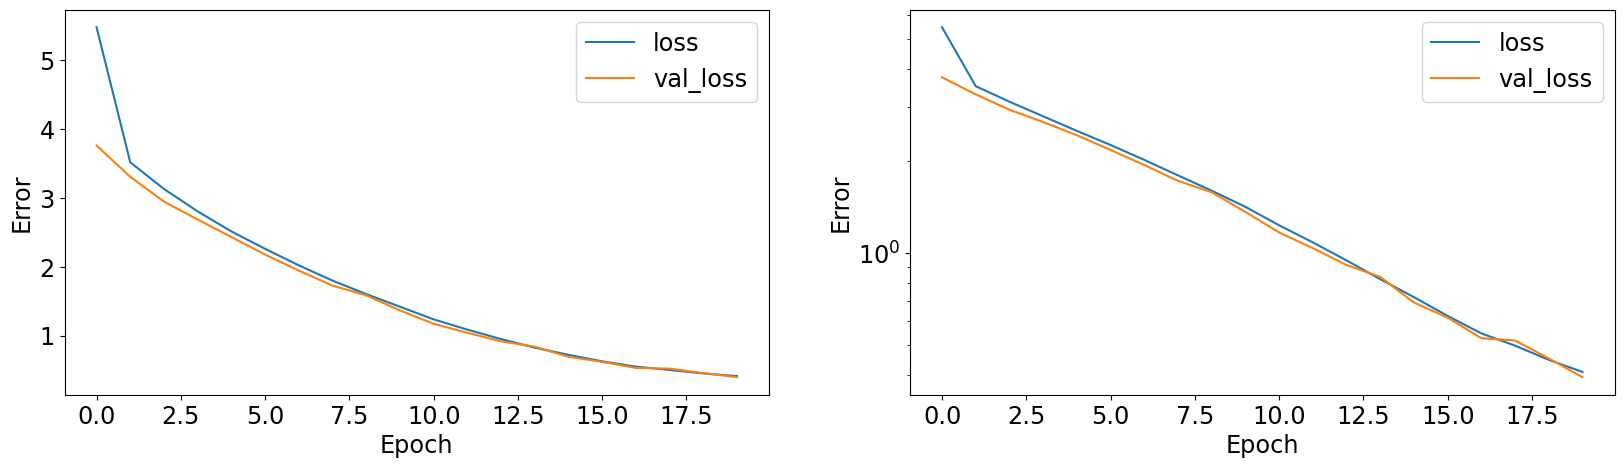

In [88]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=nEpochs, batch_size=batchSize, validation_data=(x_val, y_val), verbose=1)
plf.plotTrainHistory(history)
pass

In [89]:
print(colored("Evaluation on training dataset:","blue"))
model.evaluate(x_train, y_train)
print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

Evaluation on training dataset:
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - Accuracy: 0.9846 - loss: 0.3487
Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.9716 - loss: 0.4055


[0.39363589882850647, 0.9735000133514404]

**Proszę:**

* użyć kryterium Bayesa do skonstruowania finalnej odpowiedzi modelu na pytanie **Do której klasy należy dany przykład?**
* narysować macierz pomyłek dla zbioru treningowego i walidacyjnego
* macierze pomyłek proszę znormalizować względem prawdziwych etykiet.

**Wskazówka:** do rysowania macierzy pomyłek można użyć klasy `sklearn.metrics.ConfusionMatrixDisplay`

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is prediction:  [[9.9990034e-01 1.4087664e-10 6.8791053e-07 2.7492851e-07 8.7395267e-07
  8.2008901e-06 8.7108034e-05 6.4045899e-08 2.3751807e-06 4.6310110e-08]
 [3.5970535e-07 6.6578984e-08 4.7306262e-06 4.9066289e-06 2.3467514e-07
  1.1251947e-09 1.5989272e-10 9.9997008e-01 2.1307976e-07 1.9478834e-05]
 [2.7365923e-07 2.7156906e-08 1.0287649e-05 9.9996209e-01 1.4620351e-08
  1.2013197e-05 5.9079647e-10 1.5572474e-06 4.4283779e-06 9.3037306e-06]]
This is class:  [0 7 3]
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'Validation data')

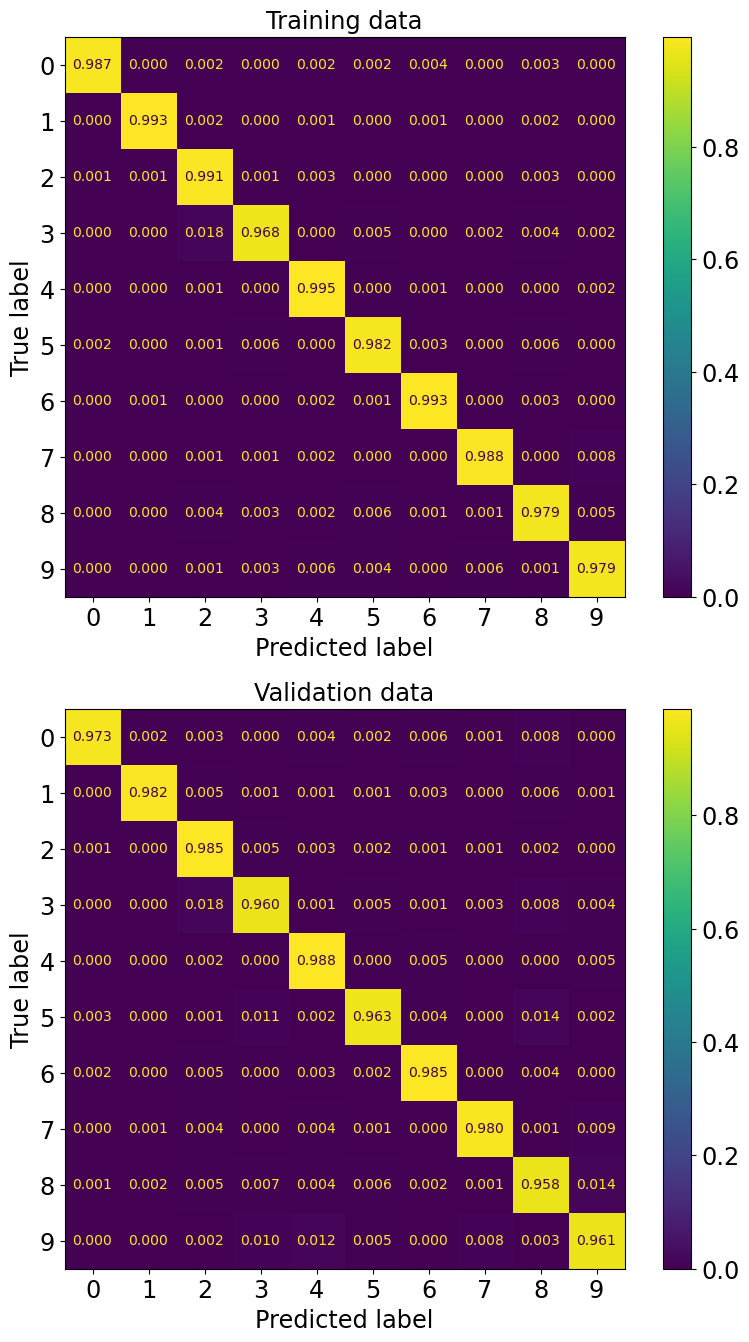

In [103]:
y_pred = model.predict(x_val)
y_class = np.argmax(y_pred, axis=1)
print(colored("This is prediction: ","blue"), y_pred[:3])
print(colored("This is class: ","blue"), y_class[:3])


from sklearn.metrics import ConfusionMatrixDisplay
fig, axis = plt.subplots(2, 1, figsize=(10,16))
y_pred = model.predict(x_train)
y_class = np.argmax(y_pred, axis=1)
ConfusionMatrixDisplay.from_predictions(y_train, y_class, ax=axis[0], colorbar=True, normalize='true', values_format='.3f')
y_pred = model.predict(x_val)
y_class = np.argmax(y_pred, axis=1)
ConfusionMatrixDisplay.from_predictions(y_val, y_class, ax=axis[1], colorbar=True, normalize='true', values_format='.3f')
axis[0].set_title("Training data")
axis[1].set_title("Validation data")

**Proszę:**

* narysować cztery losowe przykłady z informacją etykietach: prawdziwej i przyznanej przez model
* narysować cztery przykłady, w których odpowiedź modelu **nie** jest poprawna

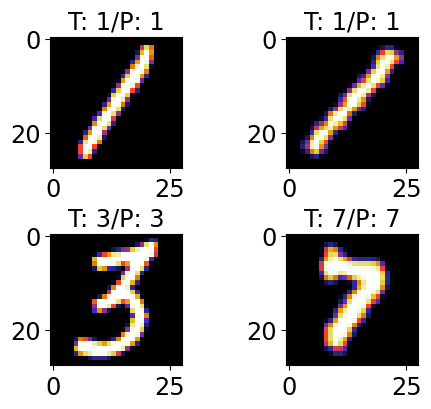

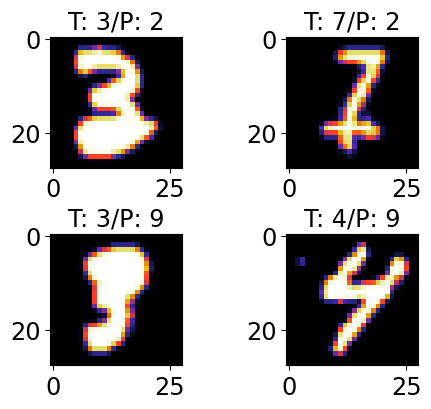

In [113]:
emnist_fcn.plotMNIST(x_val, y_val, y_class)
mask = y_val != y_class
emnist_fcn.plotMNIST(x_val[mask], y_val[mask], y_class[mask])

## Zapis modelu

Model stworzony w Keras może być zapisany w całości - struktura i wagi lub jako same wagi.
W nazwie pliku modelu warto zakodować podstawowe meta dane o treningu, np. datę i liczbę epok.

In [114]:
currentTime = datetime.now().strftime("%b_%d_%Y_%H_%M")
path = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/training/{epoch:04d}_"+currentTime+".keras"
model.save(path.format(epoch=nEpochs));

## Wczytywanie modelu

Model można wczytać w dowolnym innym miejscu kodu. Wczytany model pozwala na te same operacje co oryginalny model "z kodu",
w szczególności:

* kontynuację treningu
* wykonanie predykcji

In [115]:
nEpochsSaved = 20
checkpoint_path = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/training/{epoch:04d}_"+currentTime+".keras"
model = tf.keras.models.load_model(checkpoint_path.format(epoch=nEpochsSaved))
model.summary()
print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,351 (4.00 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 698,901 (2.67 MB)

Evaluation on validation dataset:


2025-04-09 12:57:56.850559: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.9716 - loss: 0.4055


[0.39363589882850647, 0.9735000133514404]

## Zapis modelu w trakcie treningu

Model można automatycznie zapisywać w trakcie procesu treningu - służą do tego dedykowane funkcje wywołań zwrotnych - ```callbacks```. Funkcja ```tf.keras.callbacks.ModelCheckpoint``` zapisuje model w trakcie treningu:

```Python
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath=checkpoint_filepath, # ścieżka do plików modelu. Wymaga odpowiedniego formatowania
                                                          # jeśli pliki modeli nie mają być nadpisywane, np.:
                                                          # checkpoints/model_{epoch:02d}.keras
                                                          # jeśli zapisyujemy tylko wagi nazwa pliku musi kończyć się na weights.h5
                            save_weights_only=True,       # flaga sterująca zapisem całej struktury modelu, lub jedynie jego wag
                            monitor='val_accuracy',       # kryterium wyboru najlepszego modelu na danym etapie treningu
                            mode='max',                   # kierunek kryterium: max - więcej znaczy lepiej, min - odwrotnie
                            save_best_only=True)          # zapisuje model jeśli jest lepszy niż model poprzednio zapisany
```    

**Proszę:**

* dodać wywołanie zwrotne `ModelCheckpoint` do konfiguracji treningu modelu
* zadbać o odpowiednie nazewnictwo plików modelu

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - Accuracy: 0.9816 - loss: 0.2729
Epoch 1: val_Accuracy improved from -inf to 0.96980, saving model to /Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/training/checkpoints/model_checkpoint_epoch_01.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9816 - loss: 0.2729 - val_Accuracy: 0.9698 - val_loss: 0.3311
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - Accuracy: 0.9802 - loss: 0.2759
Epoch 2: val_Accuracy did not improve from 0.96980
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - Accuracy: 0.9802 - loss: 0.2759 - val_Accuracy: 0.9663 - val_loss: 0.3403
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - Accuracy: 0.9831 - loss: 0.2625
Epoch 3: val_Accuracy improved from 0.96980 to 0.97360, saving model to /Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/training/checkpoints/model_checkpoint_epoch_03.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - Accuracy: 0.9831 - loss: 0.2625 - val_Accuracy

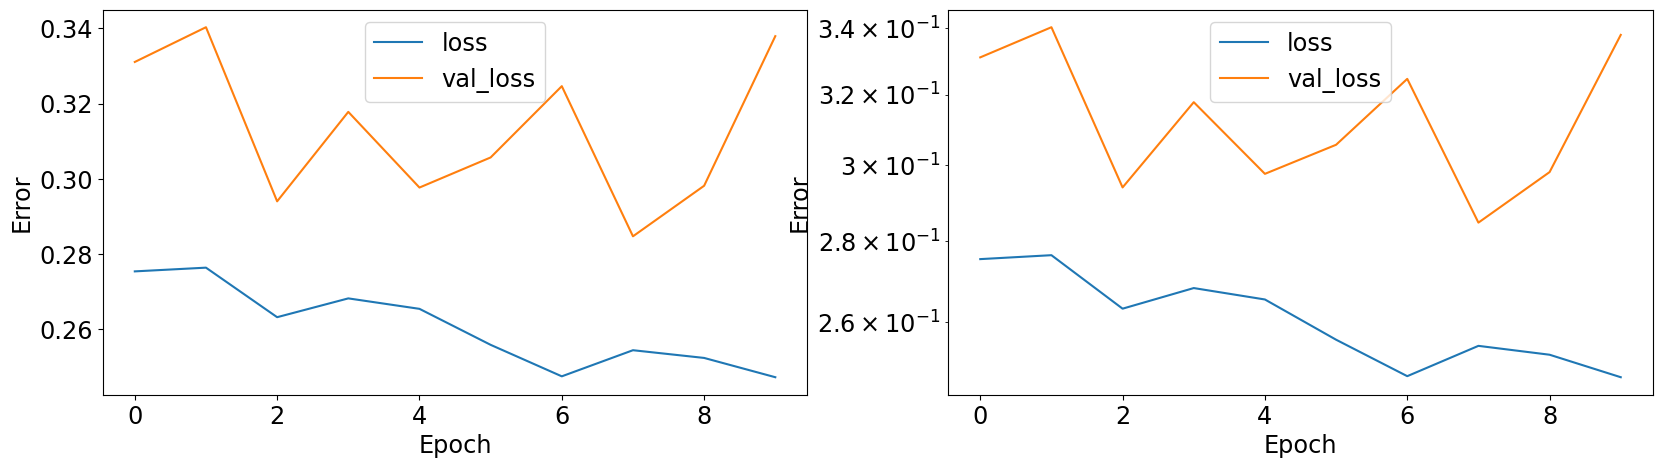

In [131]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=5,
                                            min_delta=1E-3,
                                            verbose = 1)

checkpoint_path = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/training/checkpoints/model_checkpoint_epoch_{epoch:02d}.weights.h5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                            filepath=checkpoint_path,
                                                            save_weights_only=True,
                                                            monitor='val_Accuracy',
                                                            mode='max',
                                                            save_best_only=True,
                                                            verbose=1)

callback = [early_stop, model_checkpoint_callback]



history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=batchSize, validation_data=(x_val, y_val), verbose=1, callbacks=callback)
plf.plotTrainHistory(history)

## Wczytywanie wag.

Jeśli w trakcie treningu zapisywano same wagi, trzeba je wczytać do istniejącego modelu:
```Python
checkpoint_path = "training/checkpoints/model_checkpoint_epoch_01.weights.h5"
model.load_weights(checkpoint_path)
model.summary()
```

**Proszę:**

* stworzyć nowy model
* obliczyć dokładność na zbiorze walidacyjnym - jakiej wartości się spodziewamy dla `surowego` modelu?
* wczytać wagi modelu zapisane przez funkcję ``tf.keras.callbacks.ModelCheckpoint``
* obliczyć dokładność na zbiorze walidacyjnym. Czy widać, że model zawiera wagi będące efektem treningu?

In [132]:
model = getModel(InputShape, nNeurons, lr_schedule, metrics=metric, outputNeurons=nOutputNeurons, 
                 kernel_regularizer=karnel_regularization, hiddenActivation='relu', loss_fn='sparse_categorical_crossentropy', 
                 outputActivation='softmax')

print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

checkpoint_path = "/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/training/checkpoints/model_checkpoint_epoch_01.weights.h5"
model.load_weights(checkpoint_path)
model.summary()

print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

Evaluation on validation dataset:


2025-04-09 13:41:12.449479: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.1170 - loss: 139.1533


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 69 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.9663 - loss: 0.3502


[0.33107781410217285, 0.9697999954223633]

# Zadanie domowe

Trening klasyfikatora na zbiorze wielkich liter i cyfr ze zbioru `emnist-byclass-train`.

**Proszę:**

* wczytać zbióry `emnist-byclass-train` i `emnist-byclass-test`(uwaga pliki są duże i długo ładują się na Colab!)
* wybrać przykłady o numerze klasy mniejszym niż 36, czyli cyfry i wielkie litery
* zdefiniować i przeprowadzić trening modelu.
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```
Decoded message is: HELLO WORLD

```

**UWAGA**: Kod musi używać funkcji zdefiniowanych w module `emnist_functions`
i działać z przygotowanymi poniżej komórkami. Należy zdefiniować następujące funkcje:
  
* ```emnist_functions.getEMNIST(datasetName, datasetPath)``` - funkcja łądująca dane
* ```emnist_functions.preprocessData(x,y)``` - funkcja wybierająca podzbiór wielkich liter i cyfr
* ```emnist_functions.getModel(...)``` - funkcja zwracająca model do treningu
* ```emnist_functions.trainModel(...)``` - funkcja trenująca i rysująca historię funkcji straty
* ```emnist_functions.plotTrainHistory(history)```
* ```emnist_functions.plotMNIST_CM(y_train,y_pred, label)``` - funkcja rysująca macierz pomyłek. Parametr `label` to napis "Training" lub "Validation"
* ```emnist_functions.decodeMessage(model, encoded)``` - funkcja dekodująca komunikat
* moduł `emnist_functions` powinien zawierać zmienne definiujące sieć:
  
  ```Python
  inputShape = ...
  nNeurons = ...
  lastClassNumber = 36
  nOutputNeurons = ...
  nEpochs = ...
  ``` 

In [ ]:
#Input data loading
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-byclass-train"
datasetPath = "../data/EMNIST/gzip/"
lastClassNumber = emnist_fcn.lastClassNumber

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)

datasetName = "emnist-byclass-test"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)

In [ ]:
%%time
#model definition and training
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShape
nNeurons = emnist_fcn.nNeurons
nOutputNeurons = emnist_fcn.lastClassNumber
nEpochs = emnist_fcn.nEpochs


model = emnist_fcn.getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                            nNeurons=nNeurons,
                            hiddenActivation="relu",
                            outputActivation="softmax")

model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test);

In [ ]:
#evaluation
importlib.reload(emnist_fcn);
y_pred = tf.argmax(model.predict(x_train, batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

In [ ]:
#message decoding
importlib.reload(emnist_fcn);
fileName = "../data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

emnist_fcn.decodeMessage(model, encoded)

In [ ]:
#message encoding (only for lecturer)
...rozwiązanie...
pass

In [ ]:
#Input data loading
...rozwiązanie...
pass

2025-03-25 10:27:27.819489: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:28.364822: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:28.889133: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:29.653688: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.


Training data shapes: (533993, 28, 28) (533993,)
Test data shapes: (89264, 28, 28) (89264,)
Number of categories: 36


2025-03-25 10:27:42.107879: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1507139648 exceeds 10% of free system memory.
I0000 00:00:1742894868.233507 4146216 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_6', 864 bytes spill stores, 1736 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_4', 864 bytes spill stores, 1736 bytes spill loads

I0000 00:00:1742894883.838747 4146213 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_5', 864 bytes spill stores, 1736 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_4', 864 bytes spill stores, 1736 bytes spill loads



Evaluation on training dataset:
16688/16688 ━━━━━━━━━━━━━━━━━━━━ 14s 819us/step - accuracy: 0.7859 - loss: 1.3203
Evaluation on test dataset:
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - accuracy: 0.7860 - loss: 1.3206
CPU times: user 12min 27s, sys: 35.8 s, total: 13min 3s
Wall time: 11min 51s


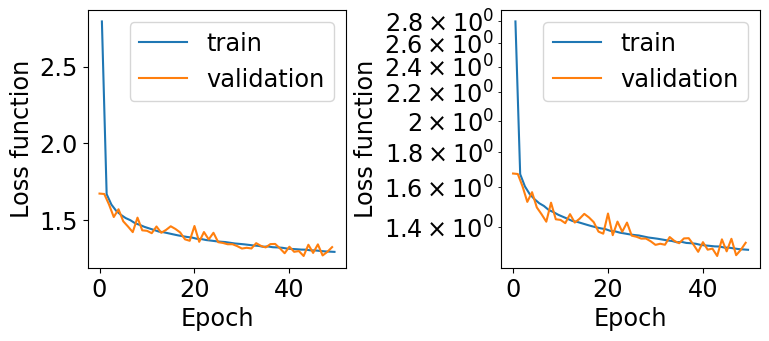

In [ ]:
%%time
importlib.reload(emnist_fcn);

#model definition and training
...rozwiązanie...
pass

I0000 00:00:1742895586.629734 4187846 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_45', 48 bytes spill stores, 64 bytes spill loads



4122/4172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

I0000 00:00:1742895592.237454 4188120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_45', 48 bytes spill stores, 48 bytes spill loads



4172/4172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


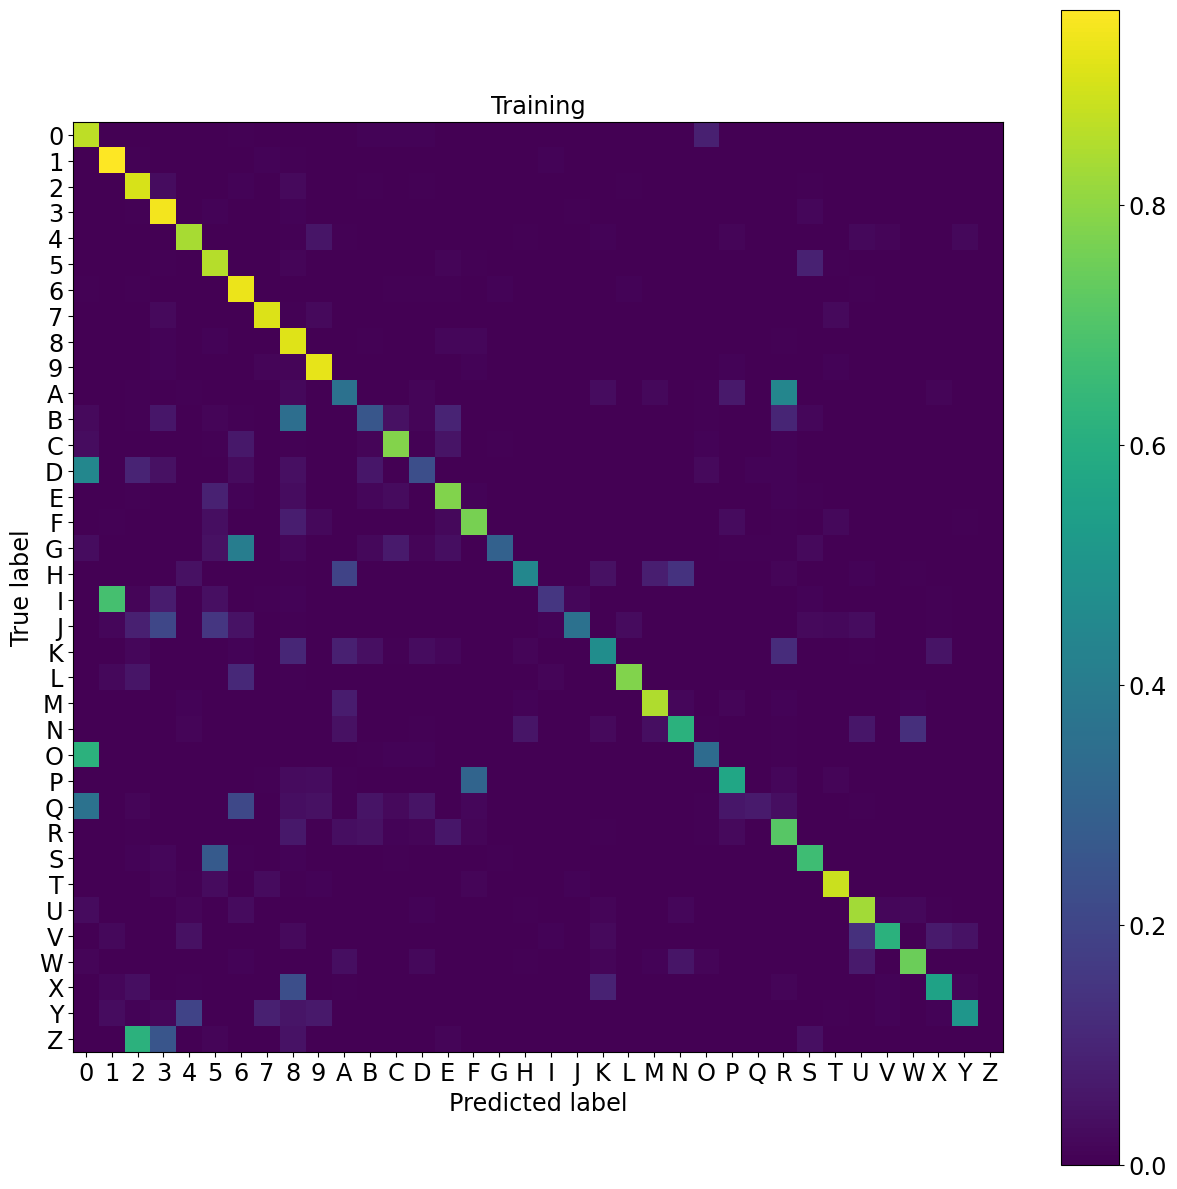

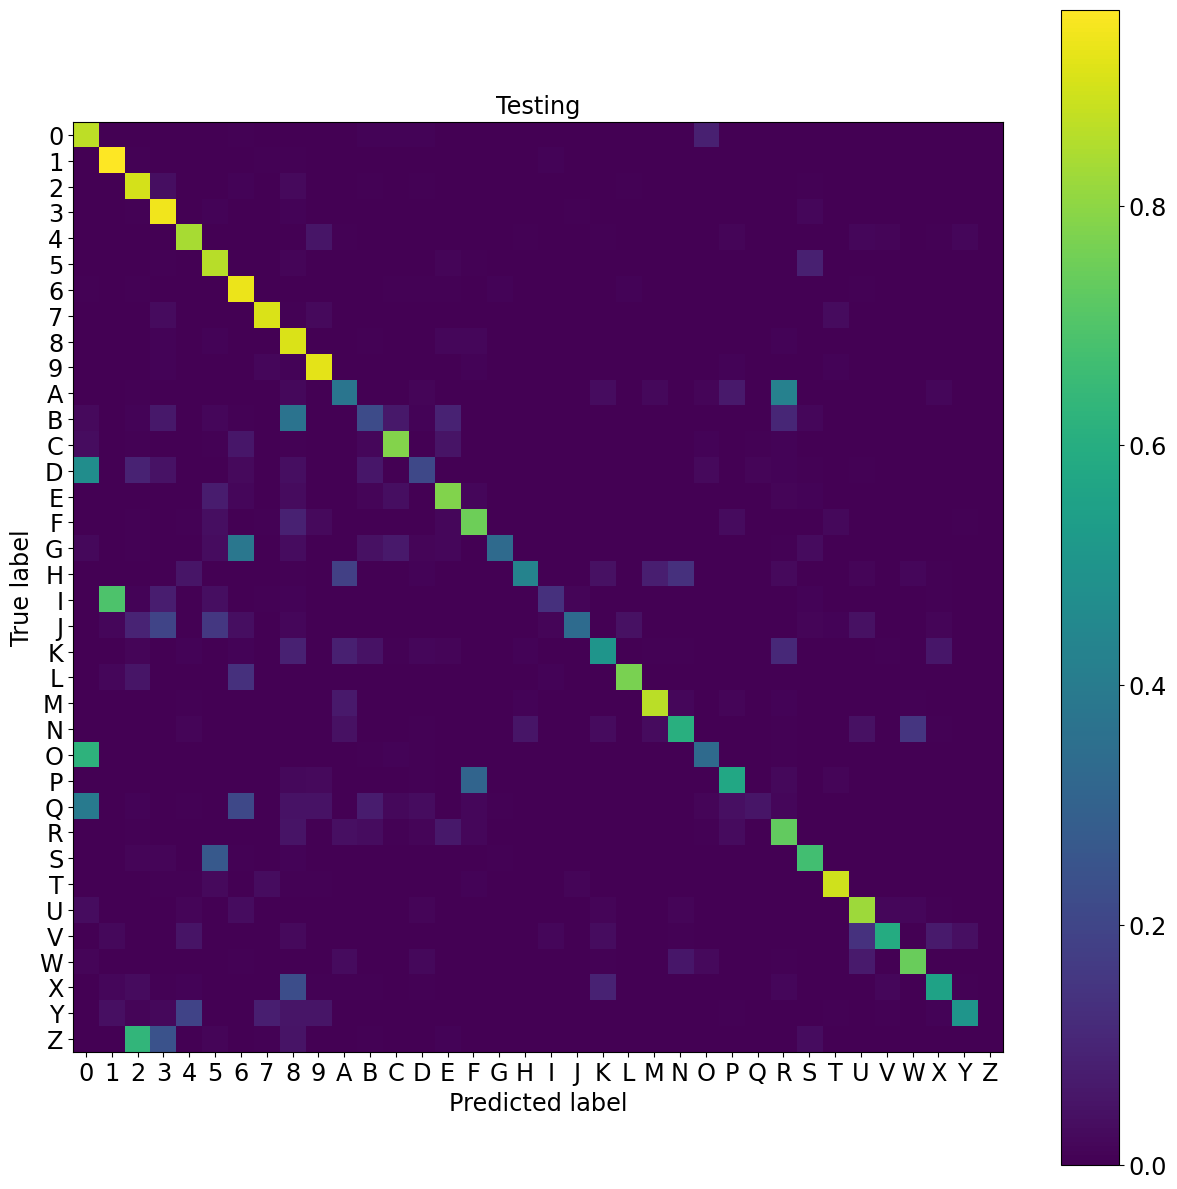

In [ ]:
#evaluation
...rozwiązanie...
pass

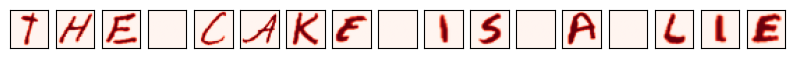

In [ ]:
...rozwiązanie...
pass

In [ ]:
#message decoding
...rozwiązanie...
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Decoded message is: 76E CABE 1S A 21E
